In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from mpl_toolkits.mplot3d import Axes3D

In [52]:
# 创建数据集
test = np.array([[2004, 98.31]])
data = np.array([
    [2001, 100.83, 410], [2005, 90.9, 500], [2007, 130.03, 550], [2004, 78.88, 410], [2006, 74.22, 460],
    [2005, 90.4, 497], [1983, 64.59, 370], [2000, 164.06, 610], [2003, 147.5, 560], [2003, 58.51, 408],
    [1999, 95.11, 565], [2000, 85.57, 430], [1995, 66.44, 378], [2003, 94.27, 498], [2007, 125.1, 760],
    [2006, 111.2, 730], [2008, 88.99, 430], [2005, 92.13, 506], [2008, 101.35, 405], [2000, 158.9, 615]])

In [53]:
# 核函数的取值
kernel = C(0.1, (0.001, 0.1)) * RBF(0.5, (1e-4, 10))
# 创建高斯过程回归,并训练
reg = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1) 
reg.fit(data[:, :-1], data[:, -1])

c:\Program Files\Python39\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 0.1. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Program Files\Python39\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(alpha=0.1, kernel=0.316**2 * RBF(length_scale=0.5),
                         n_restarts_optimizer=10)

In [54]:
# 创建一个作图用的网格的测试数据，数据位线性，x为【1982，2009】间隔位0.5；y为【57.5，165】间隔位0.5
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xset, yset = np.meshgrid(np.arange(x_min, x_max, 0.5), np.arange(y_min, y_max, 0.5))

In [55]:
# 查看网格测试数据输出结果，并返回标准差。
output, err = reg.predict(np.c_[xset.ravel(), yset.ravel()], return_std=True) 
output, err = output.reshape(xset.shape), err.reshape(xset.shape)
sigma = np.sum(reg.predict(data[:, :-1], return_std=True)[1])
up, down = output * (1 + 1.96 * err), output * (1 - 1.96 * err)

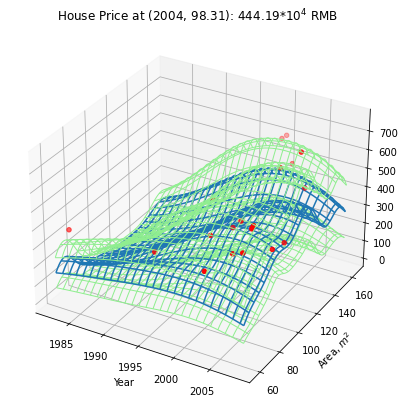

In [56]:
# 作图，并画出
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_wireframe(xset, yset, output, rstride=10, cstride=2, antialiased=True)
surf_u = ax1.plot_wireframe(xset, yset, up, colors='lightgreen', linewidths=1,
                            rstride=10, cstride=2, antialiased=True)
surf_d = ax1.plot_wireframe(xset, yset, down, colors='lightgreen', linewidths=1,
                            rstride=10, cstride=2, antialiased=True)

ax1.scatter(data[:, 0], data[:, 1], data[:, 2], c='red') 
ax1.set_title('House Price at (2004, 98.31): {0:.2f}$*10^4$ RMB'.format(reg.predict(test)[0]))
ax1.set_xlabel('Year')
ax1.set_ylabel('Area, $m^2$')
 
plt.show()